In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Preparation

## Exploration

Tahap eksplorasi dilakukan dengan mengecek tipe data (df.info), jumlah baris dan kolom (df.shape) jumlah missing value per kolom(df.isna().sum()) dan menggunakan statistik deskriptif (df.describe) untuk mengidentifikasi kualitas data awal sebelum pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Remove Irrelevant Columns

Penghapusan kolom yang irrelevan dilakukan dengan menduplikasi df ke data yang terpisah (new_df) dan menggunakan .drop(axis=1) untuk menghapus kolom PassengerID, Name, Ticket, dan Cabin.

In [7]:
new_df = df.copy()
new_df = new_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
# test_df = test_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
new_df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
new_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handle Missing Values

In [9]:
new_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Dari hasil diatas, terlihat banyak sekali missing value di fitur Age. Untuk mengisi data hilang tersebut, kami memiliki asumsi jika Pclass yang lebih tinggi pastinya di huni oleh umur yang lebih tua. Karena asumsinya lebih tua = lebih kaya. Selain itu, asumsinya adalah akan ada perbedaan rata rata umur untuk masing masing gender nya karena jika pasangan naik kapal titanic otomatis kelas nya akan sama tapi umur kedua orang tersebut kemungkinan besar berbeda. Dan Ketika umurnya berbeda, kemungkinan besar umur wanita akan lebih muda dari laki lakinya karena memang naturalnya seperti itu.

In [10]:
median_age = df.groupby(['Sex', 'Pclass'])['Age'].median()
median_age

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

Median Age di ambil dari Sex dan Pclass sesuai analisis diatas. 

In [11]:
new_df['Age'] = new_df['Age'].fillna(new_df.groupby(['Sex','Pclass'])['Age'].transform('median'))
# new_df['Embarked'] = new_df['Embarked'].fillna(new_df['Embarked'].mode()[0])


# test_df['Age'] = test_df['Age'].fillna(test_df.groupby(['Sex','Pclass'])['Age'].transform('median'))
# test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

In [12]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,21.5,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
new_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

## Validation

Validasi data menggunakan assert Python dan logika boolean Pandas untuk mengecek validitas logika data sebelum masuk ke model. Kode memeriksa bahwa Age dan Fare tidak bernilai negatif serta memastikan Pclass hanya berisi 1, 2, atau 3 melalui .isin().

In [14]:
assert (new_df['Age'] >= 0).all(), "Terdapat data umur yang negatif."
assert (new_df['Fare'] >= 0).all(), "Terdapat data harga tiket yang negatif."
assert new_df['Pclass'].isin([1, 2, 3]).all(), "Terdapat data Pclass yang tidak valid."

## Handle Outliers

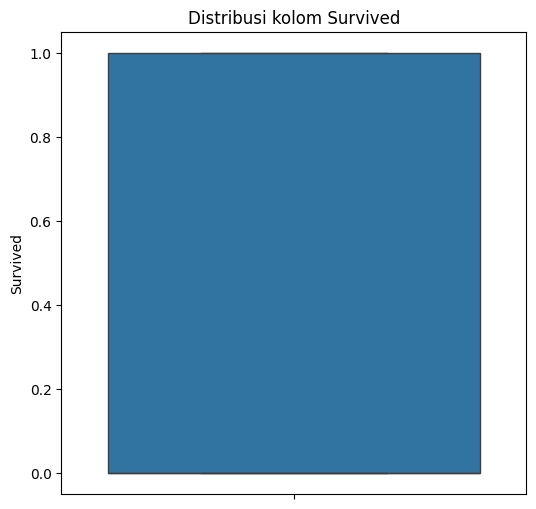

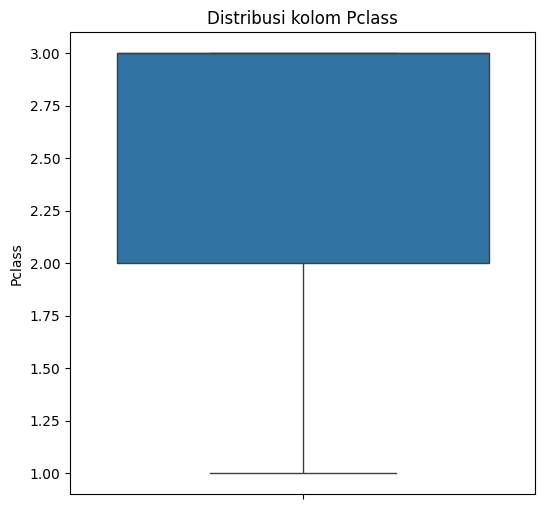

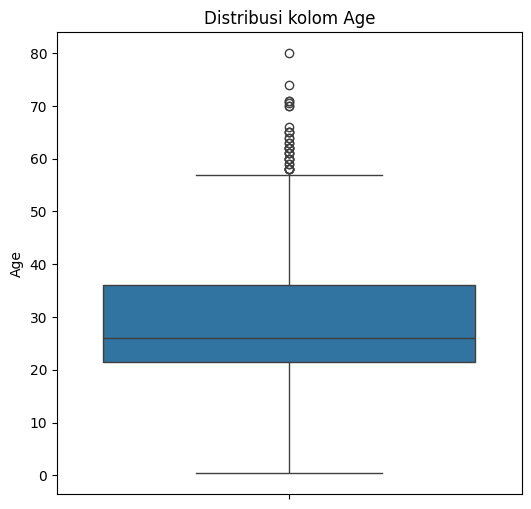

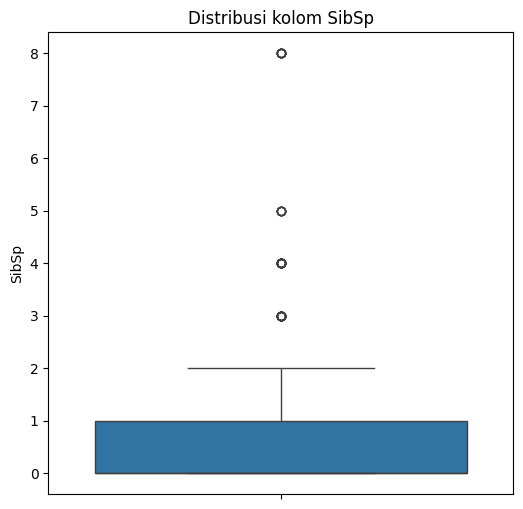

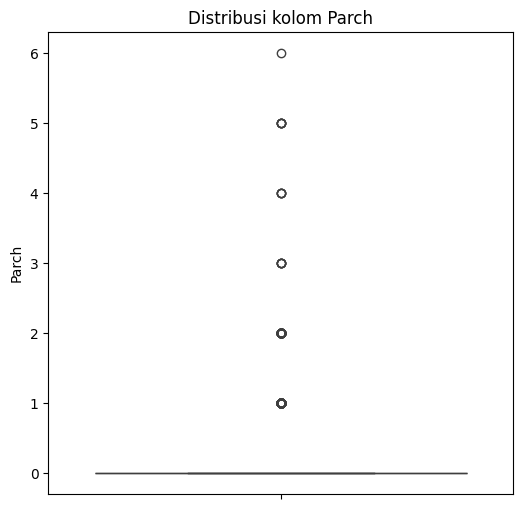

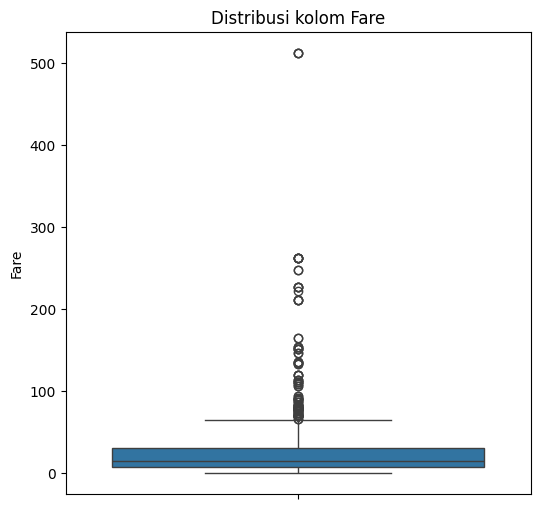

In [15]:
for col in new_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(new_df[col])
    plt.title(f"Distribusi kolom {col}")
    plt.show()

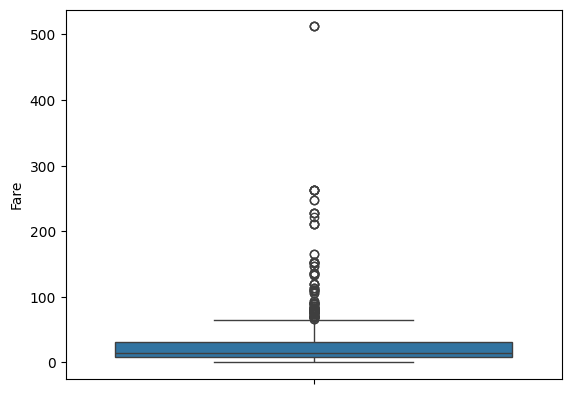

In [16]:
sns.boxplot(new_df['Fare'])
plt.show()


Outlier harganya terlihat sangat jauh, akan tetapi ini masih masuk akal karena memang di titanic seharusnya ada sebagian kecil orang yang membayar sangat mahal untuk kemewahan kemewahan tertentu

Kurang bijak kalau kita langsung membuang outlier yang masih masuk akal (feasible), maka dari itu, lebih baik kita lakukan capping (dengan winsorization) atau transformation menggunakan log transform (karena datanya right-skewed).

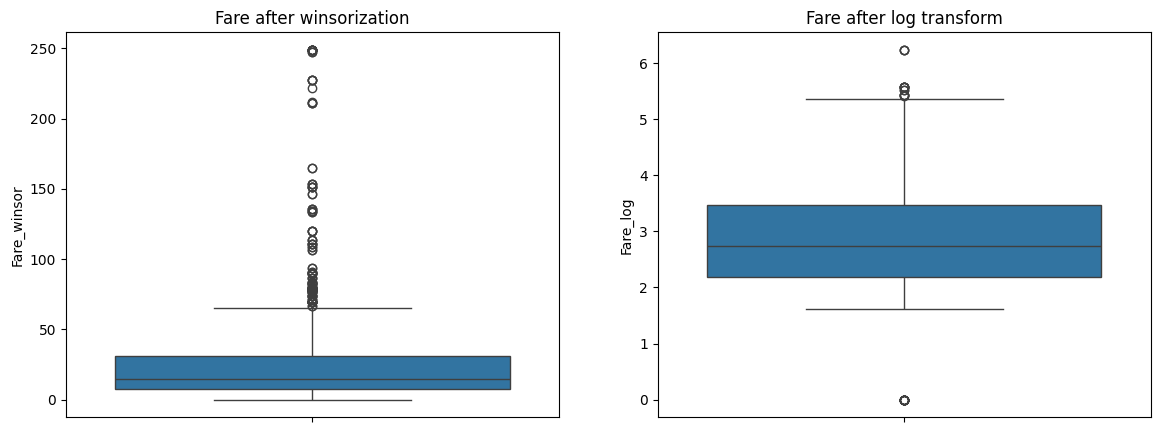

In [17]:
upper_limit = new_df['Fare'].quantile(0.99)
new_df['Fare_winsor'] = np.where(new_df['Fare'] > upper_limit, upper_limit, new_df['Fare'])

# 3. Log transform
new_df['Fare_log'] = new_df['Fare'].apply(lambda x: np.log(x + 1))

# 4. Visualisasi lagi
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(new_df['Fare_winsor'])
plt.title("Fare after winsorization")

plt.subplot(1,2,2)
sns.boxplot(new_df['Fare_log'])
plt.title("Fare after log transform")

plt.show()

dilihat sekilas, hasil transformasi log membuat distribusinya lebih seimbang, tapi sementara kita akan pertahankan kedua kolom ini dan lakukan keputusan pemilihan fitur di bagiannya sendiri nanti.

## Remove Duplicates

In [18]:
df.duplicated().sum()

0

In [19]:
df.duplicated(subset=['Name','Ticket']).sum()

0

## Encoding

Mengubah gender menjadi numerik

In [20]:
new_df['Sex'] = new_df['Sex'].map({'male': 0, 'female': 1})

new_df = pd.get_dummies(new_df, columns=['Embarked'], drop_first=True)

test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

new_df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_winsor,Fare_log,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,7.2500,2.110213,False,True
1,1,1,1,38.0,1,0,71.2833,71.2833,4.280593,False,False
2,1,3,1,26.0,0,0,7.9250,7.9250,2.188856,False,True
3,1,1,1,35.0,1,0,53.1000,53.1000,3.990834,False,True
4,0,3,0,35.0,0,0,8.0500,8.0500,2.202765,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,13.0000,2.639057,False,True
887,1,1,1,19.0,0,0,30.0000,30.0000,3.433987,False,True
888,0,3,1,21.5,1,2,23.4500,23.4500,3.196630,False,True
889,1,1,0,26.0,0,0,30.0000,30.0000,3.433987,False,False


## Feature Engineering

In [21]:
new_df['FamilySize'] = new_df['SibSp'] + new_df['Parch'] + 1

new_df['IsAlone'] = (new_df['FamilySize'] == 1).astype(int)


test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)


age_df = new_df.copy()
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_winsor,Fare_log,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,7.2500,2.110213,False,True,2,0
1,1,1,1,38.0,1,0,71.2833,71.2833,4.280593,False,False,2,0
2,1,3,1,26.0,0,0,7.9250,7.9250,2.188856,False,True,1,1
3,1,1,1,35.0,1,0,53.1000,53.1000,3.990834,False,True,2,0
4,0,3,0,35.0,0,0,8.0500,8.0500,2.202765,False,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,13.0000,2.639057,False,True,1,1
887,1,1,1,19.0,0,0,30.0000,30.0000,3.433987,False,True,1,1
888,0,3,1,21.5,1,2,23.4500,23.4500,3.196630,False,True,4,0
889,1,1,0,26.0,0,0,30.0000,30.0000,3.433987,False,False,1,1


## Feature Selection

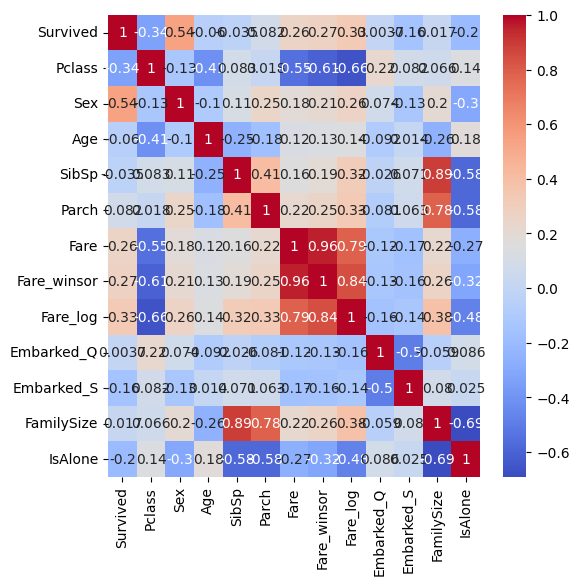

In [22]:
feat_sel_corr = new_df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(feat_sel_corr, annot=True, cmap="coolwarm")
plt.show()

In [23]:
feat_sel_corr['Survived'].abs().sort_values()

Embarked_Q     0.003650
FamilySize     0.016639
SibSp          0.035322
Age            0.059579
Parch          0.081629
Embarked_S     0.155660
IsAlone        0.203367
Fare           0.257307
Fare_winsor    0.273008
Fare_log       0.329862
Pclass         0.338481
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64

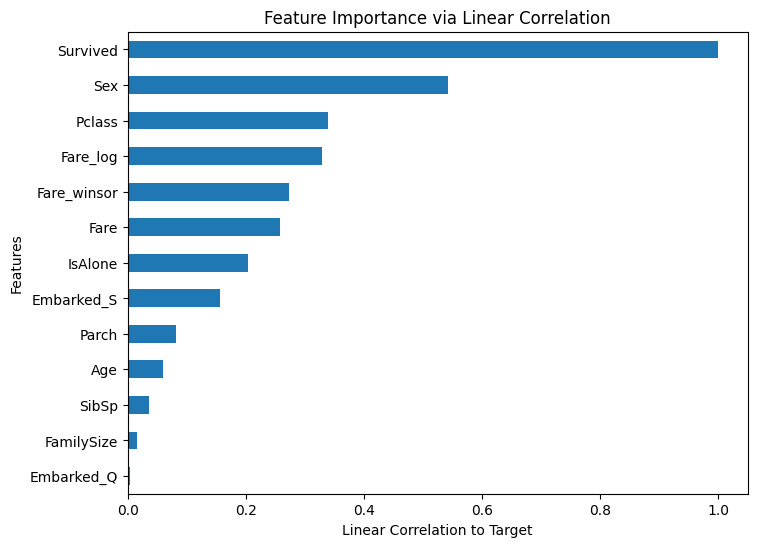

In [24]:

# Horizontal bar chart
plt.figure(figsize=(8,6))
feat_sel_corr['Survived'].abs().sort_values().plot(kind='barh')
plt.xlabel("Linear Correlation to Target")
plt.ylabel("Features")
plt.title("Feature Importance via Linear Correlation")
plt.show()


terlihat dari linear correlationnya, tidak semua fitur berkorelasi tinggi dengan kolom target "Survived". Mengingat fitur fare dan fare_log ini kolinear tetapi kalah berkorelasi dengan target dibandingkan fare_log, kedua fitur tersebut bisa kita hapus saja. Untuk fitur yang lain, kita bisa analisis lagi dengan mutual info.

In [25]:
new_df = new_df.drop(columns=["Fare_winsor", "Fare"])

In [26]:
from sklearn.feature_selection import mutual_info_classif
x = new_df.drop(columns=["Survived"])
y = new_df["Survived"]

mi = mutual_info_classif(x, y)

# Create a Series with column names as index
mi_scores = pd.Series(mi, index=x.columns)

# Sort for readability (optional)
mi_scores = mi_scores.sort_values(ascending=False)

print(mi_scores)


Fare_log      0.134281
Sex           0.129890
Pclass        0.054708
Age           0.050037
Embarked_S    0.046179
FamilySize    0.024178
IsAlone       0.018257
Parch         0.006877
SibSp         0.006648
Embarked_Q    0.000000
dtype: float64


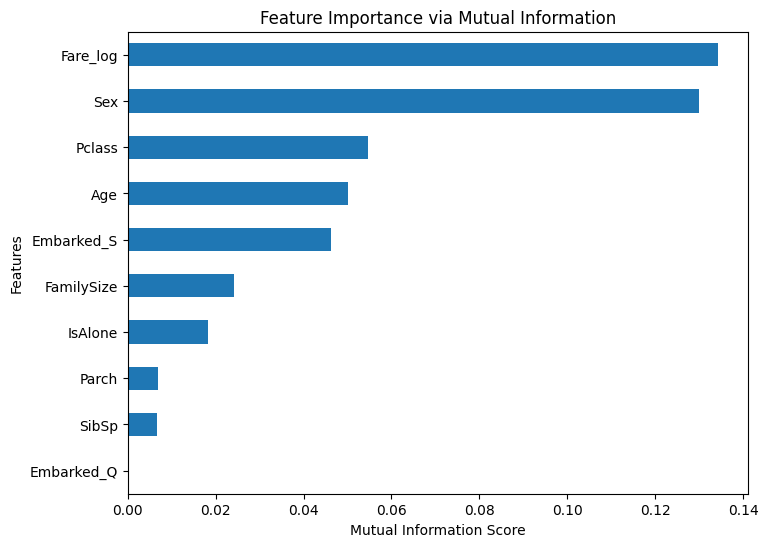

In [27]:
mi_scores = mi_scores.sort_values(ascending=False)

# Horizontal bar chart
plt.figure(figsize=(8,6))
mi_scores.plot(kind='barh')
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Feature Importance via Mutual Information")
plt.gca().invert_yaxis()  # Highest score at the top
plt.show()


oke dari sini kita ambil top 5 dari corr dan mi (union)

In [28]:
candidate_feats = feat_sel_corr["Survived"].abs().sort_values(ascending=False).index.tolist()
candidate_feats

['Survived',
 'Sex',
 'Pclass',
 'Fare_log',
 'Fare_winsor',
 'Fare',
 'IsAlone',
 'Embarked_S',
 'Parch',
 'Age',
 'SibSp',
 'FamilySize',
 'Embarked_Q']

In [29]:
candidate_feats.remove("Fare")
candidate_feats.remove("Fare_winsor")
candidate_feats

['Survived',
 'Sex',
 'Pclass',
 'Fare_log',
 'IsAlone',
 'Embarked_S',
 'Parch',
 'Age',
 'SibSp',
 'FamilySize',
 'Embarked_Q']

In [30]:
final_feats = candidate_feats[:6]
final_feats

['Survived', 'Sex', 'Pclass', 'Fare_log', 'IsAlone', 'Embarked_S']

karena Embarked_S berasal dari OHE, sejatinya tidak bermakna kalau hanya salah satu yang kita ikut sertakan, maka kita perlu tambahkan Embarked_Q juga ke final_feats

In [31]:
final_feats.append("Embarked_Q")

In [32]:
candidate_feats = mi_scores.index.tolist()[:6]

In [33]:
for el in candidate_feats:
    if el not in final_feats:
        final_feats.append(el)

final_feats

['Survived',
 'Sex',
 'Pclass',
 'Fare_log',
 'IsAlone',
 'Embarked_S',
 'Embarked_Q',
 'Age',
 'FamilySize']

In [34]:
new_df = new_df[final_feats]
new_df

,Survived,Sex,Pclass,Fare_log,IsAlone,Embarked_S,Embarked_Q,Age,FamilySize
0,0,0,3,2.110213,0,True,False,22.0,2
1,1,1,1,4.280593,0,False,False,38.0,2
2,1,1,3,2.188856,1,True,False,26.0,1
3,1,1,1,3.990834,0,True,False,35.0,2
4,0,0,3,2.202765,1,True,False,35.0,1
...,...,...,...,...,...,...,...,...,...
886,0,0,2,2.639057,1,True,False,27.0,1
887,1,1,1,3.433987,1,True,False,19.0,1
888,0,1,3,3.196630,0,True,False,21.5,4
889,1,0,1,3.433987,1,False,False,26.0,1


## Split Data

In [35]:
train_df, test_df = train_test_split(new_df, test_size=0.3, random_state=42) 

## Scaling

untuk scaling, kita akan menggunakan RobustScaler, alasannya adalah karena adanya pencilan pada kolom fare tadi (meskipun sudah ditransformasi)

In [36]:
scaler = RobustScaler()
scaler.fit(train_df)

train_scaled = scaler.transform(train_df)
test_scaled = scaler.transform(test_df)

# Convert back to DataFrame with same columns and index
train_df = pd.DataFrame(train_scaled, columns=train_df.columns, index=train_df.index)
test_df = pd.DataFrame(test_scaled, columns=test_df.columns, index=test_df.index)

train_df.head()

,Survived,Sex,Pclass,Fare_log,IsAlone,Embarked_S,Embarked_Q,Age,FamilySize
445,1.0,0.0,-2.0,1.323281,-1.0,0.0,0.0,-1.517241,2.0
650,0.0,0.0,0.0,-0.435224,0.0,0.0,0.0,-0.068966,0.0
172,1.0,1.0,0.0,-0.190643,-1.0,0.0,0.0,-1.724138,2.0
450,0.0,0.0,-1.0,0.489168,-1.0,0.0,0.0,0.689655,3.0
314,0.0,0.0,-1.0,0.446943,-1.0,0.0,0.0,1.172414,2.0


In [37]:
print(f"Ukuran awal: {df.shape}")
print(f"Ukuran akhir: {train_df.shape}")
print(f"Kolom awal: {df.columns.tolist()}")
print(f"Kolom akhir: {train_df.columns.tolist()}")
print(f"Jumlah missing values awal: {df.isnull().sum().sum()}")
print(f"Jumlah missing values akhir: {train_df.isnull().sum().sum()}")

Ukuran awal: (891, 12)
Ukuran akhir: (623, 9)
Kolom awal: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Kolom akhir: ['Survived', 'Sex', 'Pclass', 'Fare_log', 'IsAlone', 'Embarked_S', 'Embarked_Q', 'Age', 'FamilySize']
Jumlah missing values awal: 866
Jumlah missing values akhir: 0


Data awal memiliki 12 kolom dengan 866 missing values dan outlier pada kolom Fare. Setelah melalui proses data preparation, data ditransformasi menjadi 5 fitur yang terstandarisasi. Prosesnya ini meliputi menghapus kolom irrelevan, imputasi data, feature engineering ('FamilySize', 'IsAlone'), dan normalisasi distribusi dan skala.

# Exploratory Data Analysis

Pada bagian ini akan dieksplorasi lebih lanjut terkait dataset setelah dilakukan preprocessing, yang sekaligus juga akan menjadi dataset final dalam pelatihan model.

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 445 to 102
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    623 non-null    float64
 1   Sex         623 non-null    float64
 2   Pclass      623 non-null    float64
 3   Fare_log    623 non-null    float64
 4   IsAlone     623 non-null    float64
 5   Embarked_S  623 non-null    float64
 6   Embarked_Q  623 non-null    float64
 7   Age         623 non-null    float64
 8   FamilySize  623 non-null    float64
dtypes: float64(9)
memory usage: 48.7 KB


In [39]:
train_df.describe()

,Survived,Sex,Pclass,Fare_log,IsAlone,Embarked_S,Embarked_Q,Age,FamilySize
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.370787,0.341894,-0.658106,0.169329,-0.402889,-0.266453,0.088283,0.186187,0.963082
std,0.483404,0.474725,0.819945,0.760022,0.490873,0.442459,0.283933,0.917552,1.731192
min,0.000000,0.000000,-2.000000,-2.157501,-1.000000,-1.000000,0.000000,-1.764138,0.000000
25%,0.000000,0.000000,-1.000000,-0.432642,-1.000000,-1.000000,0.000000,-0.310345,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.567358,0.000000,0.000000,0.000000,0.689655,1.000000
max,1.000000,1.000000,0.000000,2.760458,0.000000,0.000000,1.000000,3.724138,10.000000


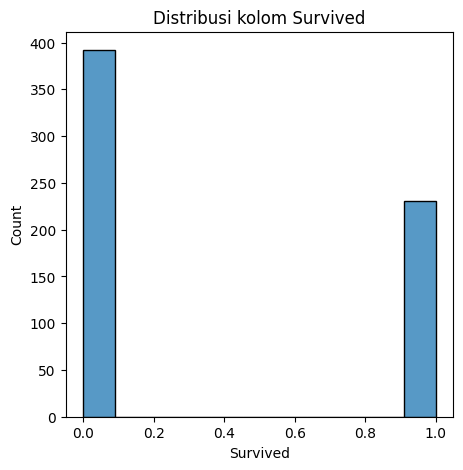

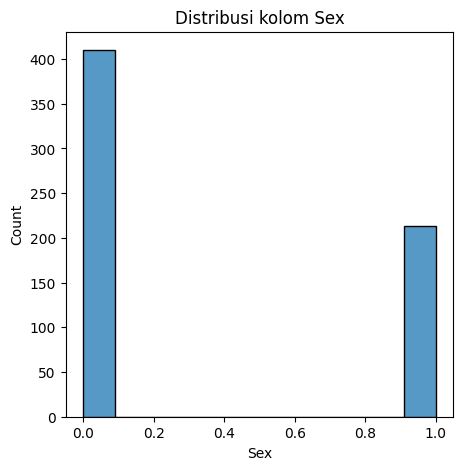

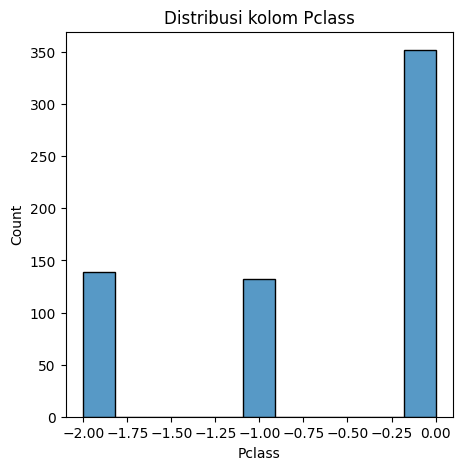

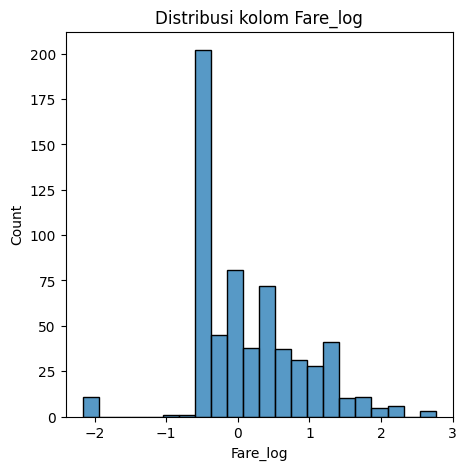

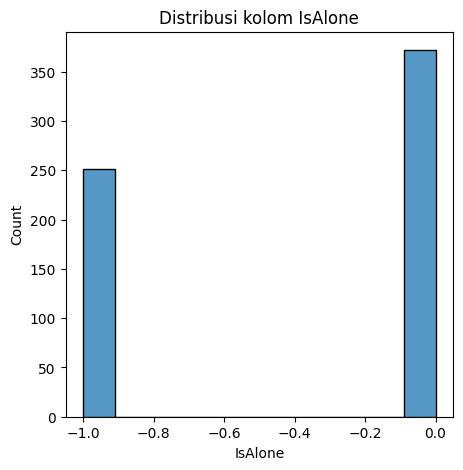

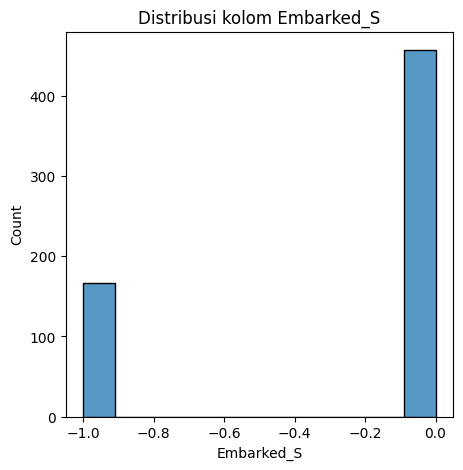

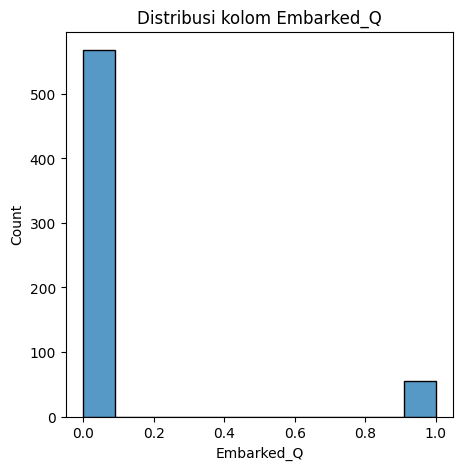

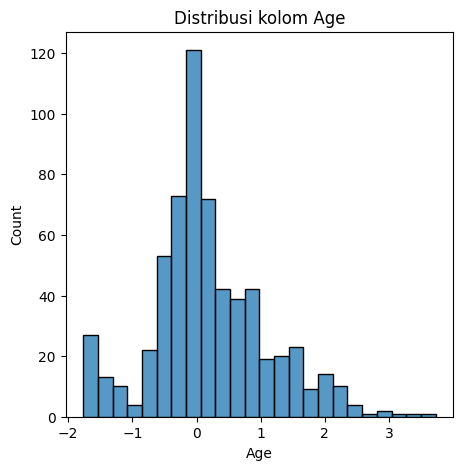

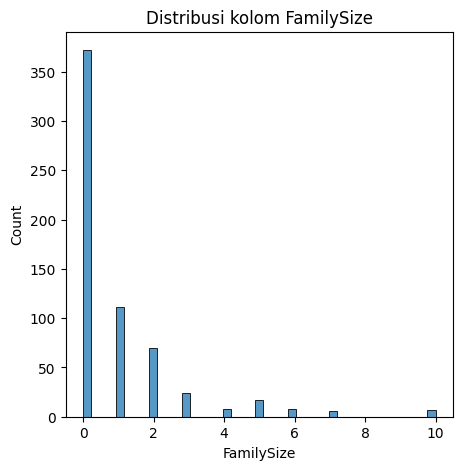

In [40]:
for col in train_df.columns:
    plt.figure(figsize=(5,5))
    plt.title(f"Distribusi kolom {col}")
    sns.histplot(train_df[col])
    plt.show()

<Axes: >

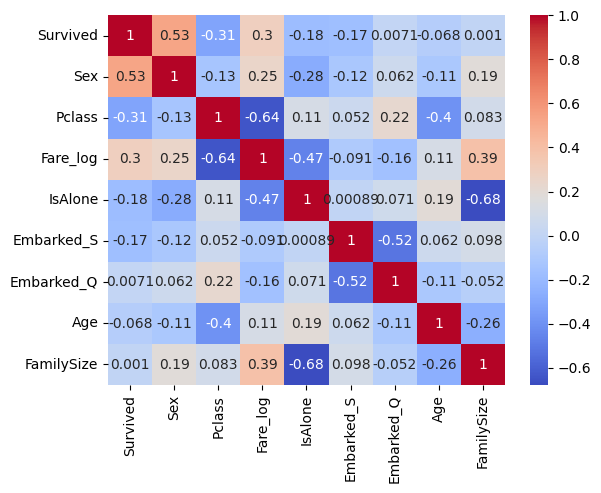

In [41]:
corr_train_df = train_df.corr()

sns.heatmap(corr_train_df, annot=True, cmap="coolwarm")

In [42]:
corr_train_df["Survived"].sort_values()

Pclass       -0.312233
IsAlone      -0.182477
Embarked_S   -0.168746
Age          -0.067547
FamilySize    0.001015
Embarked_Q    0.007107
Fare_log      0.295307
Sex           0.532598
Survived      1.000000
Name: Survived, dtype: float64

# Data Visualization

### Visualisasi 1

Tujuan visualisasi untuk melihat persebaran umur penumpang Titanic. Apakah banyak anak, Remaja, atau Orang dewasa

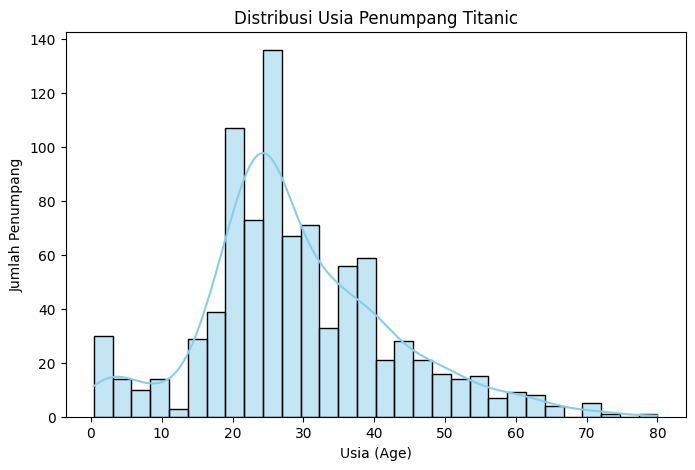

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(age_df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Usia Penumpang Titanic")
plt.xlabel("Usia (Age)")
plt.ylabel("Jumlah Penumpang")
plt.show()

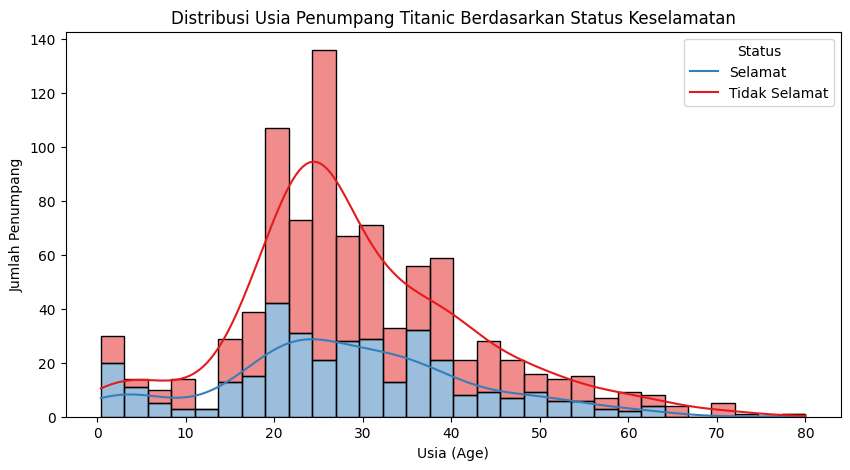

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(data=age_df, x='Age', hue='Survived', bins=30, kde=True, palette='Set1', multiple='stack')

plt.title("Distribusi Usia Penumpang Titanic Berdasarkan Status Keselamatan")
plt.xlabel("Usia (Age)")
plt.ylabel("Jumlah Penumpang")
# Menambahkan legenda manual agar lebih jelas (opsional, karena hue sudah otomatis)
plt.legend(title='Status', labels=['Selamat', 'Tidak Selamat']) 
plt.show()

### Visualisasi 2

Tujuan visualisasi ini untuk mengetahui seberapa jauh pengaruh gender terhadap keselamatan

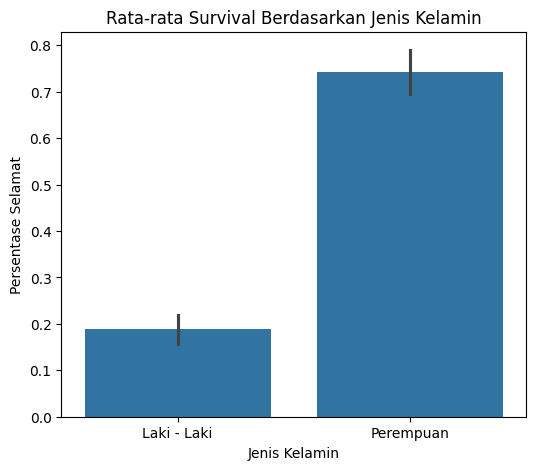

In [45]:
gender_df = new_df.copy()
gender_df['Sex'] = gender_df['Sex'].map({0 : 'Laki - Laki', 1 : 'Perempuan'})

plt.figure(figsize=(6,5))
sns.barplot(x='Sex', y='Survived', data=gender_df, estimator='mean')
plt.title("Rata-rata Survival Berdasarkan Jenis Kelamin")
plt.ylabel("Persentase Selamat")
plt.xlabel("Jenis Kelamin")
plt.show()


Hasilnya sangat menarik :v

Sepertinya kita para lelaki harus mulai memikirkan ulang terkait 'ladies first' :3

### Visualisasi 3

Karena hasil visualisai 2 cukup menarik, selanjutnya kita akan coba visualisasikan apakah gender dan Pclass berpengaruh terhadap survive

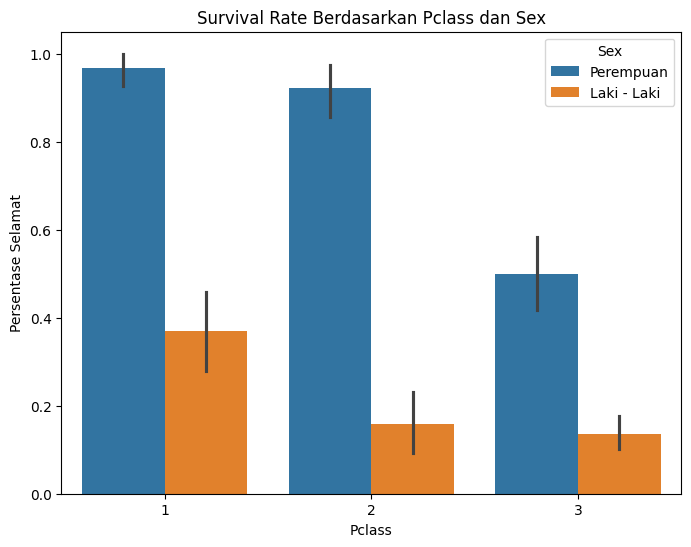

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=gender_df, estimator='mean')
plt.title("Survival Rate Berdasarkan Pclass dan Sex")
plt.ylabel("Persentase Selamat")
plt.xlabel("Pclass")
plt.legend(title="Sex")
plt.show()

Kelas cukup berpengaruh, tapi hanya class 2 ke 3 yang ngaruh nya sangat jauh. Tapi dari sini bisa di simpulkan setidaknya Laki Laki kaya class 1 persentase selamatnya hampir 2 kali lipat dari class 2. So, marilah kita berusaha agar lebih kaya.

### Visualisasi Tambahan

<Axes: >

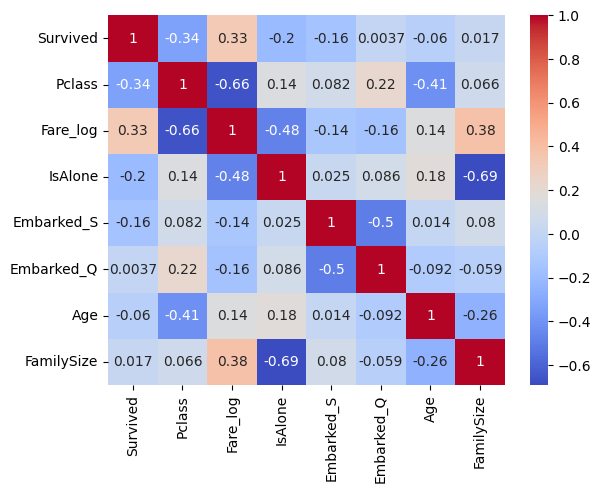

In [47]:
sns.heatmap(gender_df.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='Survived', ylabel='Age'>

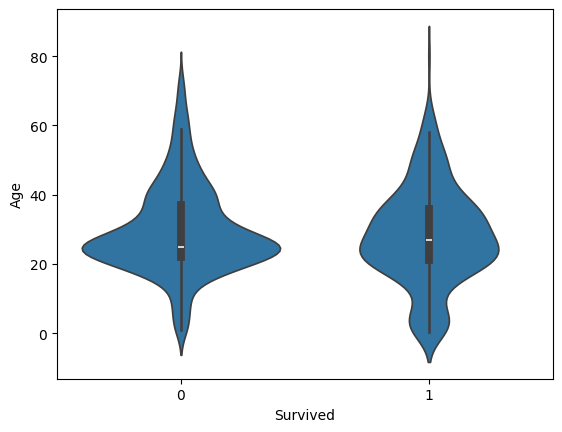

In [48]:
sns.violinplot(x='Survived', y='Age', data=age_df)


### Visualisasi 5

Visualisasi scatter plot animasi ini menampilkan hubungan antara Age dan Fare terhadap status keselamatan penumpang (Survived/Not Survived) dengan pemisahan berdasarkan jSex serta nilai Pclass sebagai frame animasi. Bentuk visualisasi ini dipilih karena mampu memperlihatkan pola multidimensi dalam satu tampilan yaitu distribusi usia, fare, sex, family size, serta Pclass.

In [79]:
viz_df = df.copy()
viz_df['Age'] = df['Age'].fillna(df.groupby(['Sex','Pclass'])['Age'].transform('median'))
viz_df['FamilySize'] = viz_df['SibSp'] + viz_df['Parch'] + 1
viz_df['Survived_Label'] = viz_df['Survived'].map({0: 'Not Survived', 1: 'Survived'})
viz_df['Sex_Label'] = viz_df['Sex'].map({0: 'Male', 1: 'Female'})
viz_df = viz_df.sort_values(by='Pclass')


fig = px.scatter(
    viz_df, 
    x="Age", 
    y="Fare", 
    animation_frame="Pclass", 
    animation_group="PassengerId",
    color="Survived_Label", 
    hover_name="Survived",
    facet_col="Sex",
    size="FamilySize",
    range_x=[0, 80], 
    range_y=[0, 300],
    title="Hubungan Age, Gender, Psclass, Family Size, dan Fare terhadap Survived")

fig.show()

Dari grafik terlihat bahwa penumpang perempuan dan mereka yang membayar tarif lebih tinggi (terutama di Pclass 1) cenderung memiliki peluang selamat lebih besar sementara Pclass 3 didominasi titik merah yang menandakan tingkat kematian tinggi. Selain itu, bubble yang lebih besar (family size besar) banyak muncul pada kelas rendah dan cenderung tidak selamat, sedangkan keluarga kecil atau solo traveler menunjukkan peluang selamat yang lebih bervariasi. Insight ini menguatkan bahwa Sex, Pclass, Fare, dan Family Size adalah fitur penting untuk mod.

# Inference

## Model 1 : Logistic Regression

In [50]:
train_df

,Survived,Sex,Pclass,Fare_log,IsAlone,Embarked_S,Embarked_Q,Age,FamilySize
445,1.0,0.0,-2.0,1.323281,-1.0,0.0,0.0,-1.517241,2.0
650,0.0,0.0,0.0,-0.435224,0.0,0.0,0.0,-0.068966,0.0
172,1.0,1.0,0.0,-0.190643,-1.0,0.0,0.0,-1.724138,2.0
450,0.0,0.0,-1.0,0.489168,-1.0,0.0,0.0,0.689655,3.0
314,0.0,0.0,-1.0,0.446943,-1.0,0.0,0.0,1.172414,2.0
...,...,...,...,...,...,...,...,...,...
106,1.0,1.0,0.0,-0.457304,0.0,0.0,0.0,-0.344828,0.0
270,0.0,0.0,-2.0,0.573563,0.0,0.0,0.0,0.965517,0.0
860,0.0,0.0,0.0,-0.017838,-1.0,0.0,0.0,1.034483,2.0
435,1.0,1.0,-2.0,1.621671,-1.0,0.0,0.0,-0.827586,3.0


In [51]:
X_train = train_df.drop(columns="Survived")
y_train = train_df["Survived"]
X_test = test_df.drop(columns="Survived")
y_test = test_df["Survived"]

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")

Shape X_train: (623, 8)
Shape X_test: (268, 8)


In [52]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [53]:
y_pred = logreg.predict(X_test)

In [54]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)


Accuracy: 0.8171641791044776
Precision: 0.8163265306122449
Recall: 0.7207207207207207
F1-score: 0.7655502392344496


In [55]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       157
         1.0       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [56]:
# Accuracy menunjukkan seberapa banyak prediksi benar secara keseluruhan.
# Precision menunjukkan ketepatan model memprediksi “selamat”.
# Recall menunjukkan kemampuan model menemukan penumpang yang benar-benar selamat.
# F1-score adalah kombinasi keduanya, digunakan ketika kelas tidak seimbang (Titanic termasuk sedikit imbalance).

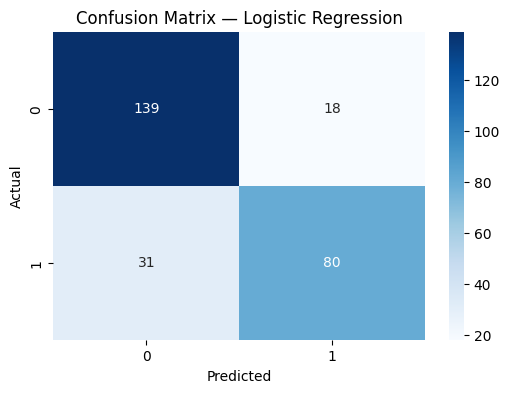

In [57]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Confusion matrix menunjukkan distribusi prediksi benar/salah dengan lebih jelas.

## Model 2: Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7686567164179104

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       157
         1.0       0.72      0.71      0.72       111

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



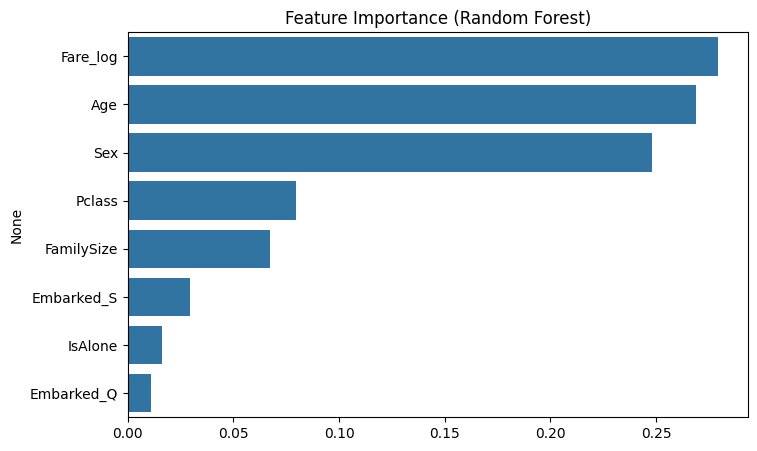

In [59]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feat_names = X_train.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=feat_names[indices])
plt.title("Feature Importance (Random Forest)")
plt.show()


## Model 3: Gradient Boosting Classifier

In [60]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [61]:
y_pred_gb = gb_model.predict(X_test)

Accuracy: 0.8060

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       157
         1.0       0.84      0.66      0.74       111

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



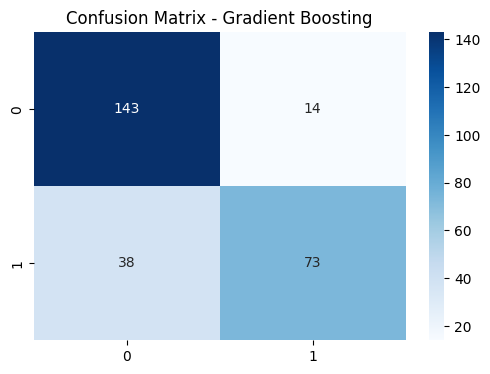

In [62]:
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {acc_gb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

## Summary

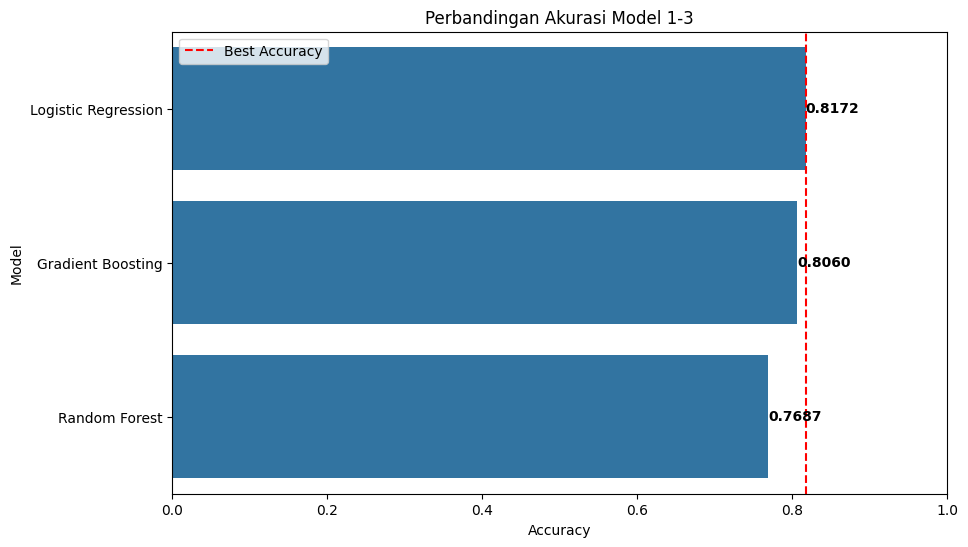

In [63]:
models=['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb)]

summary_df = pd.DataFrame({'Model': models,'Accuracy': accuracies}).sort_values(by='Accuracy', ascending=False)
summary_df

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=summary_df)
plt.title('Perbandingan Akurasi Model 1-3')
plt.xlim(0, 1.0)
plt.axvline(x=summary_df['Accuracy'].max(), color='r', linestyle='--', label='Best Accuracy')
plt.legend()

for index, value in enumerate(summary_df['Accuracy']):
    plt.text(value, index, f'{value:.4f}', va='center', fontweight='bold')
plt.show()


In [64]:
X_train

,Sex,Pclass,Fare_log,IsAlone,Embarked_S,Embarked_Q,Age,FamilySize
445,0.0,-2.0,1.323281,-1.0,0.0,0.0,-1.517241,2.0
650,0.0,0.0,-0.435224,0.0,0.0,0.0,-0.068966,0.0
172,1.0,0.0,-0.190643,-1.0,0.0,0.0,-1.724138,2.0
450,0.0,-1.0,0.489168,-1.0,0.0,0.0,0.689655,3.0
314,0.0,-1.0,0.446943,-1.0,0.0,0.0,1.172414,2.0
...,...,...,...,...,...,...,...,...
106,1.0,0.0,-0.457304,0.0,0.0,0.0,-0.344828,0.0
270,0.0,-2.0,0.573563,0.0,0.0,0.0,0.965517,0.0
860,0.0,0.0,-0.017838,-1.0,0.0,0.0,1.034483,2.0
435,1.0,-2.0,1.621671,-1.0,0.0,0.0,-0.827586,3.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7792064e-8222-43b9-b25e-59dd3bb1c97d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>